In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

%matplotlib inline

dataset_x = np.load('./preprocessed_x.npy')
dataset_y = np.load('./preprocessed_y.npy')

In [3]:
X_tr, X_ts, Y_tr, Y_ts = train_test_split(dataset_x, dataset_y, test_size = 0.1)

In [4]:
from sklearn.neural_network import MLPRegressor

clf = MLPRegressor(solver='lbfgs', hidden_layer_sizes=(10, 10), random_state=1, learning_rate_init=0.01, max_iter=5000, verbose=True)
clf.fit(X_tr, Y_tr)

predictions = clf.predict(X_ts)

Max Error: 122.95021753956001
Average Error: 29.618706489001486
Ratio Correct to +/- 36 months: 0.6885895404120443



(array([ 12.,  31.,  70., 109., 170., 277., 350., 166.,  62.,  15.]),
 array([-122.95021754, -101.06574939,  -79.18128125,  -57.2968131 ,
         -35.41234495,  -13.52787681,    8.35659134,   30.24105948,
          52.12552763,   74.00999578,   95.89446392]),
 <a list of 10 Patch objects>)

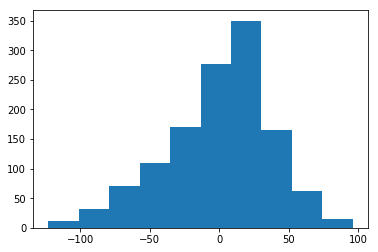

In [14]:
pairs = (list((zip(Y_ts, predictions))))

max_error = max([abs(pair[0] - pair[1]) for pair in pairs])
print (f'Max Error: {max_error}')

average_error = sum([abs(pair[0] - pair[1]) for pair in pairs])/len(pairs)
print (f'Average Error: {average_error}')

month_threshold = 36
month_threshold_ratio = (len([
                            pair for pair in pairs 
                            if (abs(pair[0] - pair[1]) <= month_threshold)
                         ]) /
                         len(pairs))
print (f'Ratio Correct to +/- {month_threshold} months: {month_threshold_ratio}')
print ()

plt.hist([(pair[0] - pair[1]) for pair in pairs])